In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
csv='C:\\Users\\solen\\OneDrive\\Desktop\\Mutual_Fund_2020\\DataScience-master\\zomato_res_final.csv'
df=pd.read_csv(csv)
df.head()



Matplotlib is building the font cache; this may take a moment.


,Additional_outlet_count,Call,Cost_for_two(Rs.),Cuisines,Features,Home_Delivery,Operational_hours,Restaurant_Location,Restaurant_Name,Restaurant_Type,...,Delivery_Time(mins),Rating,Votes,Rating_Category,Operational_after_Midnight,Cuisine_count,Feature_Count,Res_Type_Count,Competitors_in_Location,Score
0,1.0,True,1500,"Finger Food, Continental, European, Italian","Food Hygiene Rated Restaurants In Mumbai, Best...",False,12noon – 1am (Mon-Sun),Kamala Mills Compound,Lord of the Drinks,"Lounge,Casual Dining",...,NaN,4.9,1326.0,Excellent,True,4,2,2,19.0,48.000806
1,1.0,True,800,Pizza,"Value For Money, Best of Mumbai",False,11am – 12:30AM (Mon-Sun),Malad West,Joey's Pizza,Quick Bites,...,NaN,4.6,5974.0,Excellent,True,1,2,1,209.0,71.950295
2,NaN,True,2500,Seafood,"Super Seafood, Best of Mumbai",False,"Closed (Mon),12noon – 3pm, 7pm – 12midnight...",Bandra West,Bastian,"Casual Dining,Bar",...,NaN,4.5,1438.0,Excellent,False,1,2,2,241.0,43.160370
3,NaN,True,1800,"Finger Food, Continental","Where's The Party?, Best of Mumbai, Food Hygie...",False,12noon – 1am (Mon-Sun),Lower Parel,Tamasha,"Lounge,Bar",...,NaN,4.9,3275.0,Excellent,True,2,3,2,125.0,59.778427
4,2.0,True,450,"North Indian, Street Food, Fast Food, Chinese",NaN,True,"12noon – 4pm, 7pm – 11:45pm (Mon-Sun)",Vashi,Bhagat Tarachand,Casual Dining,...,45.0,4.1,1422.0,Very Good,False,4,1,1,116.0,37.546442


Displaying Column names/data

In [7]:
for col in df.columns: 
    print(col) 

Additional_outlet_count
Call
Cost_for_two(Rs.)
Cuisines
Features
Home_Delivery
Operational_hours
Restaurant_Location
Restaurant_Name
Restaurant_Type
View_Menu
Min_Order(Rs.)
Delivery_Time(mins)
Rating
Votes
Rating_Category
Operational_after_Midnight
Cuisine_count
Feature_Count
Res_Type_Count
Competitors_in_Location
Score


Reordering columns as restaurant name and restaurant location must appear first

<h2>Data Cleaning</h2>



<h2>Identifying missing values</h2>

Checking for missing values

In [8]:
print(df.isnull().values.any())

True


In delivery_Time_min_order the <b>NaN</b> values can be replaced with <b>Average Delivery yime of the city</b>

In [9]:
avg_time= df["Delivery_Time(mins)"].astype("float").mean(axis=0)
print("Average of Delivery Time:", avg_time)


Average of Delivery Time: 45.704267004647235


Now replacing NaN values with  Average delivery time

In [10]:
df["Delivery_Time(mins)"].replace(np.nan, avg_time, inplace=False)

0       45.704267
1       45.704267
2       45.704267
3       45.704267
4       45.000000
          ...    
6521    45.000000
6522    20.000000
6523    45.704267
6524    40.000000
6525    45.704267
Name: Delivery_Time(mins), Length: 6526, dtype: float64






View_menu and Call colomn have no false values,which means every restaurant have those facilities.
Removing menu and Call column

In [11]:
df.drop(['View_Menu', 'Call'], axis=1)

,Additional_outlet_count,Cost_for_two(Rs.),Cuisines,Features,Home_Delivery,Operational_hours,Restaurant_Location,Restaurant_Name,Restaurant_Type,Min_Order(Rs.),Delivery_Time(mins),Rating,Votes,Rating_Category,Operational_after_Midnight,Cuisine_count,Feature_Count,Res_Type_Count,Competitors_in_Location,Score
0,1.0,1500,"Finger Food, Continental, European, Italian","Food Hygiene Rated Restaurants In Mumbai, Best...",False,12noon – 1am (Mon-Sun),Kamala Mills Compound,Lord of the Drinks,"Lounge,Casual Dining",NaN,NaN,4.9,1326.0,Excellent,True,4,2,2,19.0,48.000806
1,1.0,800,Pizza,"Value For Money, Best of Mumbai",False,11am – 12:30AM (Mon-Sun),Malad West,Joey's Pizza,Quick Bites,NaN,NaN,4.6,5974.0,Excellent,True,1,2,1,209.0,71.950295
2,NaN,2500,Seafood,"Super Seafood, Best of Mumbai",False,"Closed (Mon),12noon – 3pm, 7pm – 12midnight...",Bandra West,Bastian,"Casual Dining,Bar",NaN,NaN,4.5,1438.0,Excellent,False,1,2,2,241.0,43.160370
3,NaN,1800,"Finger Food, Continental","Where's The Party?, Best of Mumbai, Food Hygie...",False,12noon – 1am (Mon-Sun),Lower Parel,Tamasha,"Lounge,Bar",NaN,NaN,4.9,3275.0,Excellent,True,2,3,2,125.0,59.778427
4,2.0,450,"North Indian, Street Food, Fast Food, Chinese",NaN,True,"12noon – 4pm, 7pm – 11:45pm (Mon-Sun)",Vashi,Bhagat Tarachand,Casual Dining,0.0,45.0,4.1,1422.0,Very Good,False,4,1,1,116.0,37.546442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6521,NaN,600,"South Indian, North Indian, Chinese, Fast Food...",NaN,True,8am – 12midnight (Mon-Sun),Chembur,Hotel Shreedevi,Casual Dining,99.0,45.0,3.5,115.0,Good,False,5,1,1,148.0,21.372503
6522,NaN,550,"Fast Food, North Indian",NaN,True,"9am – 9pm (Mon, Wed, Thu, Fri, Sat, Sun), Clos...",Bandra West,Mac Craig,Quick Bites,99.0,20.0,3.5,121.0,Good,False,2,1,1,241.0,21.408761
6523,NaN,350,"Fast Food, Beverages, Rolls",NaN,False,8am – 1:30am (Mon-Sun),Juhu,Ice n Rolls,Quick Bites,NaN,NaN,3.5,213.0,Good,True,3,1,1,100.0,21.964708
6524,NaN,2000,"Seafood, Chinese",NaN,True,12noon – 12:30AM (Mon-Sun),Juhu,Temple Flower - Hotel Kings International,Casual Dining,99.0,40.0,2.6,195.0,Average,True,2,1,1,100.0,9.442143


In [12]:
c=df["Competitors_in_Location"].mean()
df["Competitors_in_Location"].fillna(c, inplace = True)


In Additional_outlet_count the <b>NaN</b> values can be replaced with <b>0</b>



In [13]:
hb=0
df["Additional_outlet_count"].fillna(hb, inplace = True) 


In the rating

In [14]:
df.isnull()

,Additional_outlet_count,Call,Cost_for_two(Rs.),Cuisines,Features,Home_Delivery,Operational_hours,Restaurant_Location,Restaurant_Name,Restaurant_Type,...,Delivery_Time(mins),Rating,Votes,Rating_Category,Operational_after_Midnight,Cuisine_count,Feature_Count,Res_Type_Count,Competitors_in_Location,Score
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6521,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6522,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6523,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
6524,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False




In,<b>Features column some values are Null so we change it to Not available
    

In [15]:
df["Features"].fillna("Not Available", inplace = True) 


In [16]:
count = df['Restaurant_Type'].value_counts()
print(count)

Casual Dining                 2759
Quick Bites                   1619
Café                           238
Dessert Parlor                 222
Bakery                         182
                              ... 
Food Court,Dessert Parlor        1
Casual Dining,Bakery             1
Casual Dining,Cocktail Bar       1
Irani Cafe                       1
Lounge,Pub                       1
Name: Restaurant_Type, Length: 73, dtype: int64


From the Dataset, we can see that the 'Cuisines' Column has multiple values.
So we split each value separated by comma.

Chinese, North Indian and North Indian, Chinese are same so replacing

In [17]:
df['Cuisines'].replace({"Chinese, North Indian": "North Indian, Chinese"}, inplace=True)
df['Cuisines'].replace({"North Indian, Chinese, Mughlai": "North Indian, Mughlai, Chinese"}, inplace=True)
c = pd.concat([df, df['Cuisines'].str.split(",",expand=True)], axis = 1)
count = c['Cuisines'].value_counts()
print(count)   


North Indian, Chinese                                                        423
Fast Food                                                                    261
Chinese                                                                      235
North Indian                                                                 169
Bakery, Desserts                                                             159
                                                                            ... 
Burger, Desserts, Cafe, Fast Food, Beverages                                   1
Asian, Vietnamese, Malaysian, Japanese, Burmese                                1
Modern Indian, Asian, Continental                                              1
Mexican, Chinese, Tex-Mex, Desserts                                            1
Seafood, Maharashtrian, Goan, North Indian, Mangalorean, Chinese, Malwani      1
Name: Cuisines, Length: 2267, dtype: int64


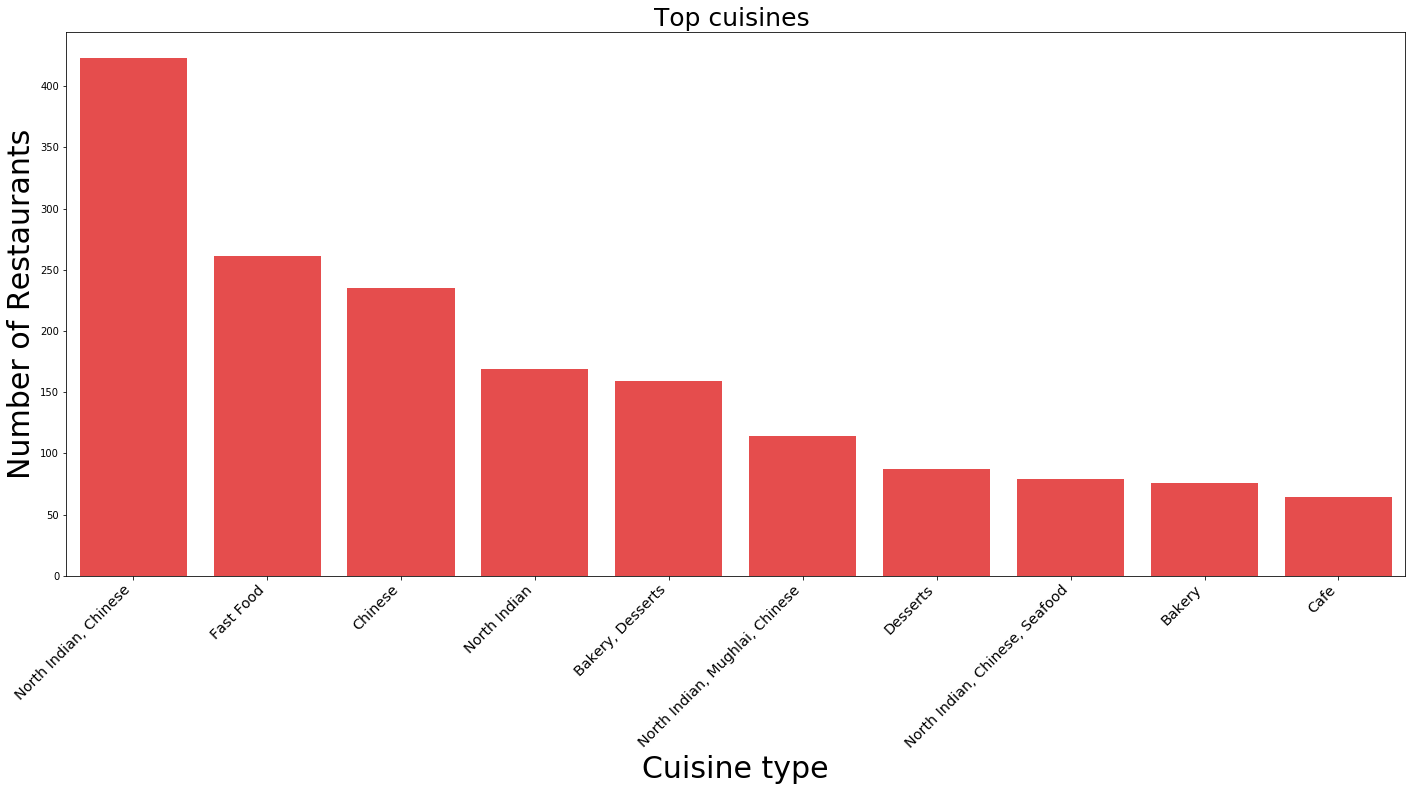

In [18]:

title="Top cuisines "
loc_count = c['Cuisines'].value_counts()[:10,]
plt.figure(figsize=(24,10))
sns.barplot(loc_count.index, loc_count.values, alpha=0.8, color = 'red')
plt.title(title, fontsize=25)
plt.ylabel('Number of Restaurants', fontsize=30)
plt.xlabel('Cuisine type', fontsize=30)
plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='x-large'  
    )
plt.show()


We get to know that <b>North Indian and Chinese</b> cuisines offering restaurants are more in number.

Now we check for location

In [19]:
count = df['Restaurant_Location'].value_counts()
print(count)

Thane West       386
Andheri West     295
Bandra West      241
Malad West       209
Mira Road        204
                ... 
Turbhe             1
Dombivali          1
Panch Pakhadi      1
Dadar              1
Panvel             1
Name: Restaurant_Location, Length: 120, dtype: int64


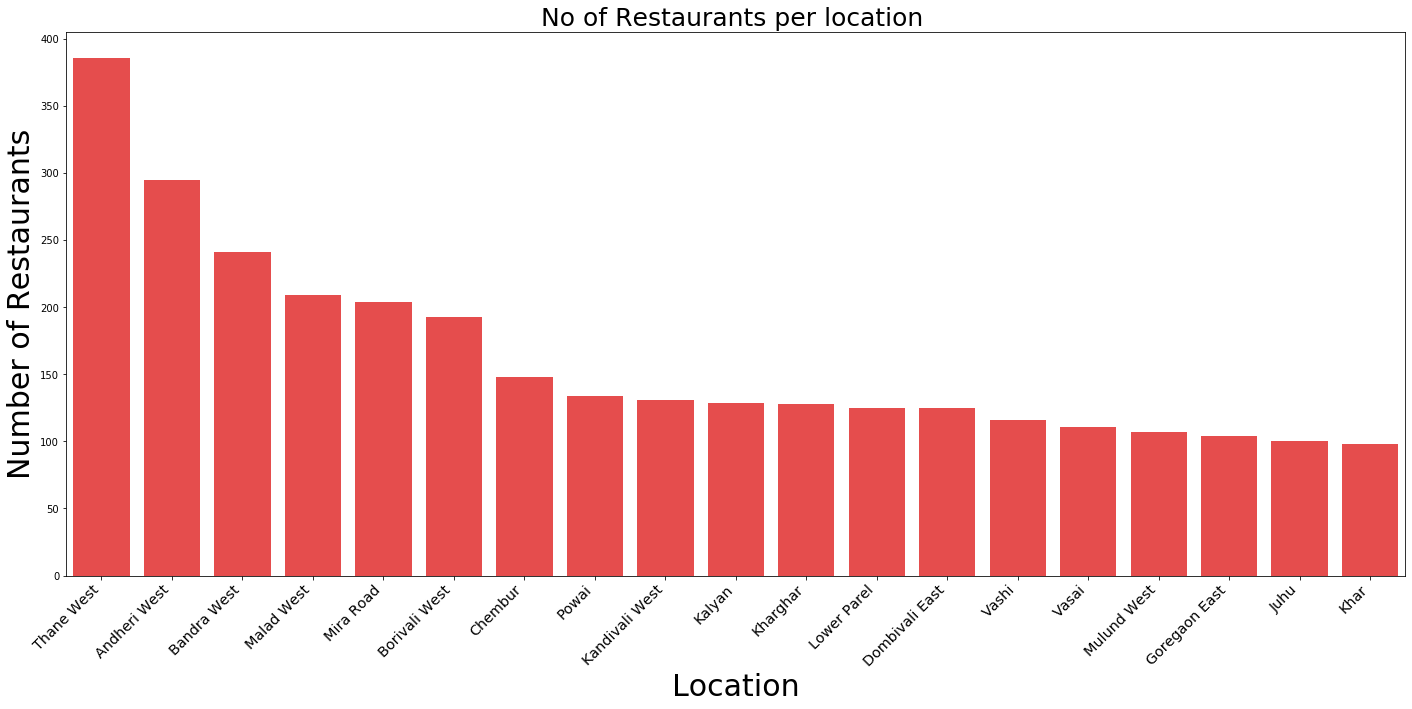

In [20]:
title="No of Restaurants per location "
loc_count = df['Restaurant_Location'].value_counts()[:19,]
plt.figure(figsize=(24,10))
sns.barplot(loc_count.index, loc_count.values, alpha=0.8, color = 'red')
plt.title(title, fontsize=25)
plt.ylabel('Number of Restaurants', fontsize=30)
plt.xlabel('Location', fontsize=30)
plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='x-large'  
    )
plt.show()

In [21]:
print(df.Rating)

0       4.9
1       4.6
2       4.5
3       4.9
4       4.1
       ... 
6521    3.5
6522    3.5
6523    3.5
6524    2.6
6525    3.4
Name: Rating, Length: 6526, dtype: float64


Now we will determine Factors affecting rating


(0, 2333)

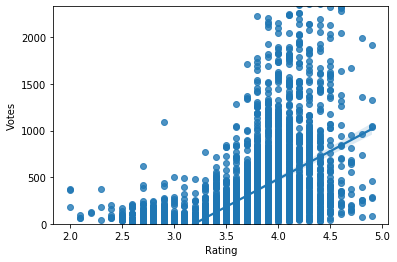

In [22]:
sns.regplot(x="Rating",y="Votes",data=df)
plt.ylim(0,2333)

In [23]:
print(df['Cost_for_two(Rs.)'].describe())

count     6526.000000
mean       650.581060
std        714.448288
min         50.000000
25%        350.000000
50%        500.000000
75%        700.000000
max      30000.000000
Name: Cost_for_two(Rs.), dtype: float64


 Postitive slope so Votes do impact the rating

(0, 3000)

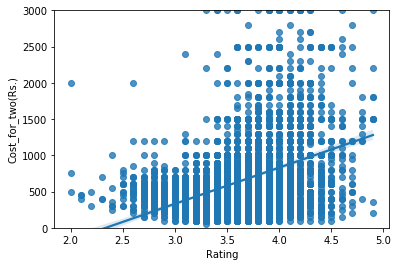

In [24]:
sns.regplot(x="Rating",y="Cost_for_two(Rs.)",data=df)
plt.ylim(0,3000)

 Postitive slope and steep increase so as cost increases rating also increase so cost is a good indicator of rating

Delivery time has NaN values so to replace those we will take average of the city


(0, 100)

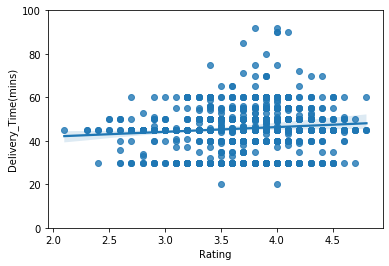

In [25]:
sns.regplot(x="Rating",y="Delivery_Time(mins)",data=df)
plt.ylim(0,100)

In [26]:
We cannot consider Delivery time as a good factor to predict rating.


SyntaxError: invalid syntax (<ipython-input-26-06032a9b5c84>, line 1)

In [ ]:
sns.regplot(x="Rating",y="Competitors_in_Location",data=df)
plt.ylim(0,)

In [ ]:
sns.regplot(x="Rating",y="Cuisine_count",data=df)
plt.ylim(0,)

In [ ]:
sns.regplot(x="Rating",y="Competitors_in_Location",data=df)
plt.ylim(0,)

In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['Cost_for_two(Rs.)'], df['Rating'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['Votes'], df['Rating'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['Cuisine_count'], df['Rating'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['Feature_Count'], df['Rating'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 


In [ ]:

pearson_coef, p_value = stats.pearsonr(df['Score'], df['Rating'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['Competitors_in_Location'], df['Rating'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['Additional_outlet_count'], df['Rating'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

<b>Linear Regression</b>

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm


In [ ]:
X = df[['Cost_for_two(Rs.)']]
Y = df['Rating']
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:5]
lm.intercept_


In [ ]:
lm.coef_


In [ ]:
print(3.5408202499779455+ 0.00015293*4000)

<b>Multiple linear regresstion</b>

In [ ]:
Z = df[['Cost_for_two(Rs.)', 'Competitors_in_Location']]

In [ ]:
lm.fit(Z, df['Rating'])

In [ ]:
lm.intercept_

In [ ]:
lm.coef_

In [ ]:
r2=3.4899446790419613+(0.00015468*2000)+(0.00041514*200)
print(r2)

In [ ]:
lf=df[df['Rating']>4.5]
lf.describe()

In [ ]:
lf.info()

In [ ]:
cs=lf['Cuisines']
counta = cs['Cuisines'].value_counts()
print(counta)

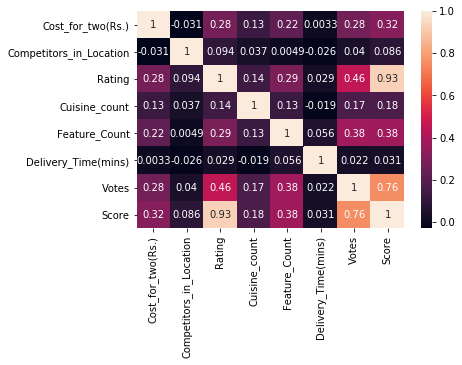

In [31]:
sns.heatmap(df[['Cost_for_two(Rs.)','Competitors_in_Location','Rating','Cuisine_count','Feature_Count','Delivery_Time(mins)','Votes','Score']].corr(),annot=True)
plt.show()